<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/Dynamic Group Datasets.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/Dynamic Group Datasets.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/Dynamic Group Datasets.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/Dynamic Group Datasets.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


# <span style="color: orange">**FiftyOne Dynamic Group**

## Creating a Dynamic Group View with `group_by`

In [1]:
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F

dataset = foz.load_zoo_dataset("cifar10", split="test")

# Take 100 samples and group by ground truth label
view = dataset.take(100, seed=51).group_by("ground_truth.label")

print(view.media_type)  # group
print(len(view))  # 10
session = fo.launch_app(view)

Split 'test' already downloaded
Loading 'cifar10' split 'test'
 100% |█████████████| 10000/10000 [2.9s elapsed, 0s remaining, 3.5K samples/s]      
Dataset 'cifar10-test' created
group
10


## Grouping and ordering frames by their original sample_id

Dataset already downloaded
Loading existing dataset 'quickstart-video'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Name:        2023.09.08.10.04.14
Media type:  image
Num samples: 1279
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    sample_id:    fiftyone.core.fields.ObjectIdField
    frame_number: fiftyone.core.fields.FrameNumberField
    detections:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)



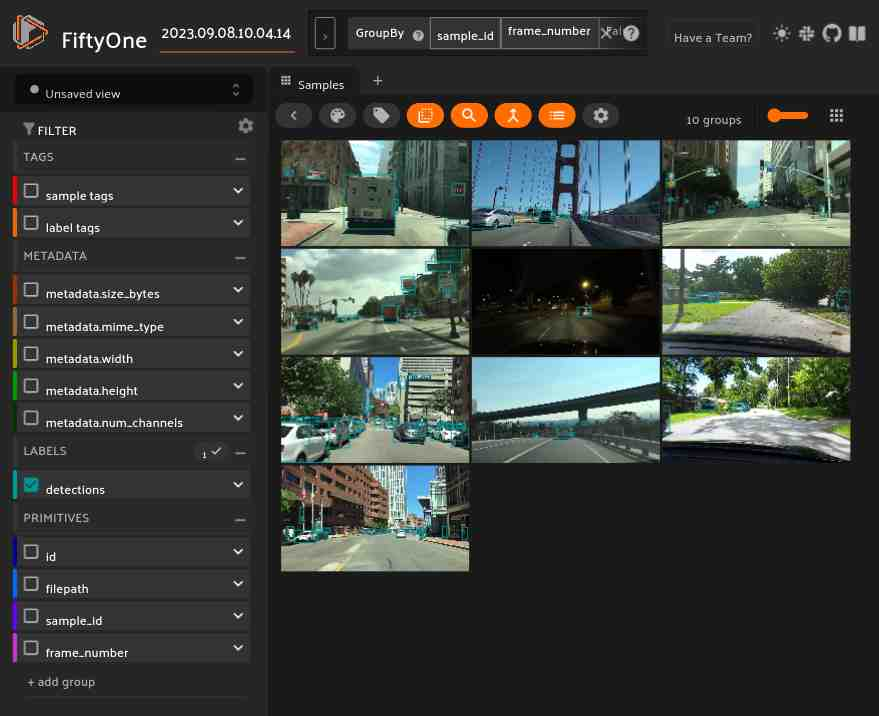

In [12]:
dataset2 = (
    foz.load_zoo_dataset("quickstart-video")
    .to_frames(sample_frames=True)
    .clone()
)
print(dataset2) #1279 samples
session.view = dataset2

In [3]:
view2 = dataset2.group_by("sample_id", order_by="frame_number")

print(len(view2))  # 10
print(view2.values("frame_number"))

10
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



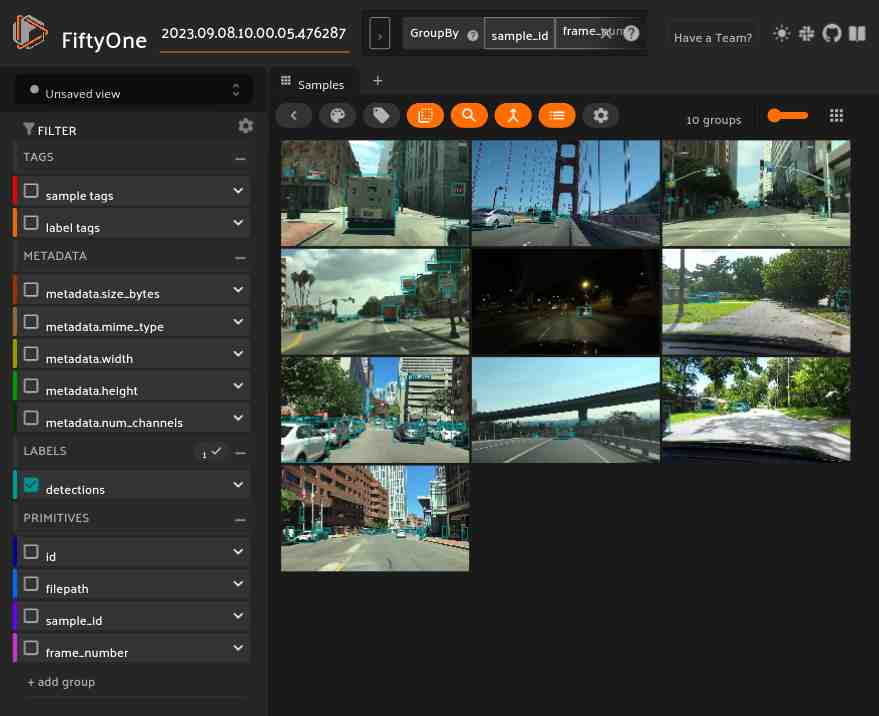

In [4]:
session.view = view2

## Working with dynamic group views

### `get_dynamic_group()`

In [5]:
sample_id = dataset2.take(1).first().sample_id
video = view2.get_dynamic_group(sample_id)

print(video.values("frame_number"))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


### `group_by` with condition

In [6]:
dataset3 = foz.load_zoo_dataset("quickstart")

# Group samples by the number of ground truth objects they contain
expr = F("ground_truth.detections").length()
view3 = dataset3.group_by(expr)

print(len(view3))  # 26
print(len(dataset3.distinct(expr)))  # 26

Dataset already downloaded
Loading existing dataset 'quickstart'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
26
26


### Iterating through dynamic group

In [7]:
# Sort the groups by label
sorted_view = view.sort_by("ground_truth.label")

for sample in sorted_view:
    print(sample.ground_truth.label)

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


### flatten()

In [8]:
# Unwind the sorted groups back into a flat collection
flat_`sorted_view = sorted_view.flatten()

print(len(flat_sorted_view))  # 1000
print(flat_sorted_view.values("ground_truth.label"))
# ['airplane', 'airplane', 'airplane', ..., 'truck']

100
['airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'cat', 'cat', 'cat', 'cat', 'cat', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'frog', 'frog', 'frog', 'frog', 'frog', 'frog', 'frog', 'frog', 'frog', 'frog', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'ship', 'ship', 'ship', 'ship', 'ship', 'ship', 'ship', 'ship', 'ship', 'ship', 'truck', 'truck', 'truck', 'truck', 'truck', 'truck', 'truck', 'truck', 'truck', 'truck', 'truck']


In [9]:
group = view.get_dynamic_group("horse")
print(len(group))  # 10

10


In [10]:
for group in sorted_view.iter_dynamic_groups():
    print("%s: %d" % (group.first().ground_truth.label, len(group)))

airplane: 14
automobile: 7
bird: 9
cat: 5
deer: 13
dog: 11
frog: 10
horse: 10
ship: 10
truck: 11
